In [1]:
import numpy as np
import matplotlib.pyplot as plt

In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anac

In [6]:
import os
os.path.exists("./results")

True

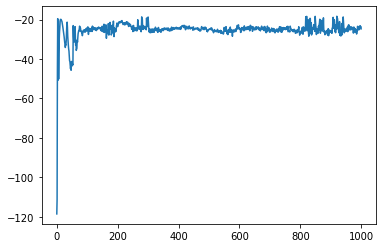

In [9]:
rewards = np.load("./results/TD3_LinearFitting_0.npy")
plt.plot(rewards)
plt.show()

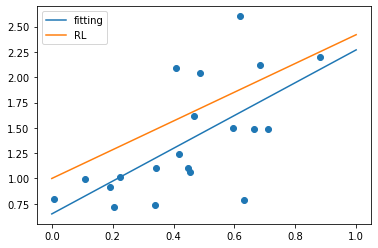

In [12]:
[x,y] = np.load("./results/TD3_LinearFitting_0_data.npy")

    #plot fitting curve
x_axis = np.linspace(0,1, num=50)
y_linear = [ j * 1.62+ 0.65 for j in x_axis ]

plt.figure(0)
plt.scatter(x,y)
plt.plot(x_axis,y_linear,label="fitting")
y_linear = [ j *1.42+1.00 for j in x_axis ]
plt.plot(x_axis,y_linear,label="RL")
plt.legend()
plt.show()

